In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [2]:
# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

In [3]:
#  dataset loading
data = pd.read_csv(r"C:\Users\SURUJ_KALITA\Desktop\blstm\DelhiCovidcsv.csv")
data

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,01-01-2019 00:00,655.50,49.08,92.30,79.22,0.30,226.00,3.57,990.10,NaN,4.65
1,01-01-2019 01:00,583.50,52.18,62.35,79.70,0.30,197.25,3.62,990.05,NaN,4.58
2,01-01-2019 02:00,435.75,55.25,60.20,78.10,0.30,202.00,3.57,989.95,NaN,4.72
3,01-01-2019 03:00,351.50,51.48,52.07,77.48,0.30,197.75,3.65,989.98,NaN,4.43
4,01-01-2019 04:00,319.75,46.30,49.42,77.98,0.30,230.50,3.87,990.12,NaN,4.02
...,...,...,...,...,...,...,...,...,...,...,...
35059,31-12-2022 19:00,131.50,58.82,8.65,81.25,0.52,165.50,5.65,976.60,NaN,17.02
35060,31-12-2022 20:00,129.25,55.02,7.15,84.28,0.30,169.00,5.72,976.60,NaN,15.78
35061,31-12-2022 21:00,148.00,53.05,6.08,87.43,0.30,168.25,5.75,976.62,NaN,14.70
35062,31-12-2022 22:00,178.25,43.45,5.48,89.18,0.30,177.75,5.78,976.60,NaN,14.02


# Importing Dataset

In [4]:
file = 'DelhiCovidcsv.csv'
df = pd.read_csv(file, parse_dates = ['From Date'], index_col = 'From Date')
df

,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
From Date,,,,,,,,,,
01-01-2019 00:00,655.50,49.08,92.30,79.22,0.30,226.00,3.57,990.10,NaN,4.65
01-01-2019 01:00,583.50,52.18,62.35,79.70,0.30,197.25,3.62,990.05,NaN,4.58
01-01-2019 02:00,435.75,55.25,60.20,78.10,0.30,202.00,3.57,989.95,NaN,4.72
01-01-2019 03:00,351.50,51.48,52.07,77.48,0.30,197.75,3.65,989.98,NaN,4.43
01-01-2019 04:00,319.75,46.30,49.42,77.98,0.30,230.50,3.87,990.12,NaN,4.02
...,...,...,...,...,...,...,...,...,...,...
31-12-2022 19:00,131.50,58.82,8.65,81.25,0.52,165.50,5.65,976.60,NaN,17.02
31-12-2022 20:00,129.25,55.02,7.15,84.28,0.30,169.00,5.72,976.60,NaN,15.78
31-12-2022 21:00,148.00,53.05,6.08,87.43,0.30,168.25,5.75,976.62,NaN,14.70


# Data Preproccesing

In [5]:
df = data.drop(columns=['NO2' , 'Ozone' , 'RH' , 'WS' , 'WD' , 'SR' , 'BP' , 'RF' , 'AT'])

In [6]:
df

,From Date,PM2.5
0,01-01-2019 00:00,655.50
1,01-01-2019 01:00,583.50
2,01-01-2019 02:00,435.75
3,01-01-2019 03:00,351.50
4,01-01-2019 04:00,319.75
...,...,...
35059,31-12-2022 19:00,131.50
35060,31-12-2022 20:00,129.25
35061,31-12-2022 21:00,148.00
35062,31-12-2022 22:00,178.25


In [7]:

# Assuming df is already defined and loaded
df = df.loc[:, ['From Date', 'PM2.5']]

# Total number of missing values
print('Total num of missing values:', df['PM2.5'].isnull().sum())
print('')

# Locate the missing value
df_missing_date = df.loc[df['PM2.5'].isnull()]
print('The date of missing value:')
print(df_missing_date.loc[:, ['From Date']])

# Replace missing value with interpolation
df['PM2.5'].interpolate(inplace=True)

# Drop the 'From Date' column
df = df.drop('From Date', axis=1)

# Optionally, print df to see the changes
print(df)


Total num of missing values: 3181

The date of missing value:
              From Date
157    07-01-2019 13:00
164    07-01-2019 20:00
165    07-01-2019 21:00
166    07-01-2019 22:00
167    07-01-2019 23:00
...                 ...
34135  23-11-2022 07:00
34136  23-11-2022 08:00
34137  23-11-2022 09:00
34138  23-11-2022 10:00
34139  23-11-2022 11:00

[3181 rows x 1 columns]
        PM2.5
0      655.50
1      583.50
2      435.75
3      351.50
4      319.75
...       ...
35059  131.50
35060  129.25
35061  148.00
35062  178.25
35063  167.25

[35064 rows x 1 columns]


In [8]:
# Split train data and test data
train_size = int(len(df)*0.8)

# train_data = df.PM2.5.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [9]:
# Scale data
# The input to scaler.fit -> array-like, sparse matrix, dataframe of shape (n_samples, n_features)
scaler = MinMaxScaler().fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [10]:
# Create input dataset
# Th input shape should be [samples, time steps, features]
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
        
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train_scaled,30)
X_test, y_test = create_dataset(test_scaled,30)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (28021, 30, 1)
y_train.shape:  (28021, 1)
X_test.shape:  (6983, 30, 1)
y_test.shape:  (6983, 1)


In [11]:
X_test[:33].shape

(33, 30, 1)

In [12]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer 
    model.add(GRU (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
   
    return model
model_gru = create_gru(64)

# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 16, shuffle = False, callbacks = [early_stop])
    return history

history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
1401/1401 [==============================] - 16s 10ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 2/100
1401/1401 [==============================] - 14s 10ms/step - loss: 9.7472e-04 - val_loss: 0.0014
Epoch 3/100
1401/1401 [==============================] - 14s 10ms/step - loss: 9.1123e-04 - val_loss: 0.0012
Epoch 4/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.7917e-04 - val_loss: 0.0011
Epoch 5/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.8682e-04 - val_loss: 0.0016
Epoch 6/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.7612e-04 - val_loss: 0.0012
Epoch 7/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.4286e-04 - val_loss: 0.0012
Epoch 8/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.6638e-04 - val_loss: 0.0013
Epoch 9/100
1401/1401 [==============================] - 14s 10ms/step - loss: 8.3915e-04 - val_loss: 0.0013
Epoch 10/100
1401/1401 

In [13]:
output_size = 10
model = model_bilstm
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(output_size))  # Output layer with 'output_size' neurons for multi-step ahead prediction
model.compile(optimizer='adam', loss='mse')

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
876/876 [==============================] - 21s 20ms/step - loss: 0.0019 - val_loss: 7.1065e-04
Epoch 2/100
876/876 [==============================] - 16s 18ms/step - loss: 8.5243e-04 - val_loss: 4.6366e-04
Epoch 3/100
876/876 [==============================] - 16s 18ms/step - loss: 7.1034e-04 - val_loss: 4.3861e-04
Epoch 4/100
876/876 [==============================] - 17s 19ms/step - loss: 6.6799e-04 - val_loss: 4.5564e-04
Epoch 5/100
876/876 [==============================] - 17s 20ms/step - loss: 6.6783e-04 - val_loss: 4.2988e-04
Epoch 6/100
876/876 [==============================] - 17s 20ms/step - loss: 6.5728e-04 - val_loss: 5.5155e-04
Epoch 7/100
876/876 [==============================] - 17s 20ms/step - loss: 6.5713e-04 - val_loss: 4.1216e-04
Epoch 8/100
876/876 [==============================] - 17s 19ms/step - loss: 6.4471e-04 - val_loss: 4.1943e-04
Epoch 9/100
876/876 [==============================] - 19s 21ms/step - loss: 6.4910e-04 - val_loss: 4.8305e-04
Epoch

876/876 [==============================] - 33s 37ms/step - loss: 5.3417e-04 - val_loss: 3.9198e-04
Epoch 75/100
876/876 [==============================] - 30s 34ms/step - loss: 5.2771e-04 - val_loss: 3.8647e-04
Epoch 76/100
876/876 [==============================] - 31s 36ms/step - loss: 5.2927e-04 - val_loss: 4.0877e-04
Epoch 77/100
876/876 [==============================] - 33s 38ms/step - loss: 5.2290e-04 - val_loss: 3.8578e-04
Epoch 78/100
876/876 [==============================] - 30s 35ms/step - loss: 5.2393e-04 - val_loss: 3.8120e-04
Epoch 79/100
876/876 [==============================] - 33s 37ms/step - loss: 5.2314e-04 - val_loss: 3.8326e-04
Epoch 80/100
876/876 [==============================] - 31s 35ms/step - loss: 5.2266e-04 - val_loss: 3.8732e-04
Epoch 81/100
876/876 [==============================] - 33s 37ms/step - loss: 5.1789e-04 - val_loss: 3.7580e-04
Epoch 82/100
876/876 [==============================] - 32s 37ms/step - loss: 5.2035e-04 - val_loss: 3.8942e-04
Epoch

In [15]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

219/219 [==============================] - 1s 5ms/step - loss: 4.0346e-04
Test Loss: 0.00040345665183849633
219/219 [==============================] - 2s 5ms/step


In [16]:
model_bilstm = model 

# Model Performance

219/219 [==============================] - 1s 6ms/step
GRU:
Mean Absolute Error: 94750.7940
Root Mean Square Error: 124465.5568

Bidirectiona LSTM:
Mean Absolute Error: 94742.0262
Root Mean Square Error: 124448.0860



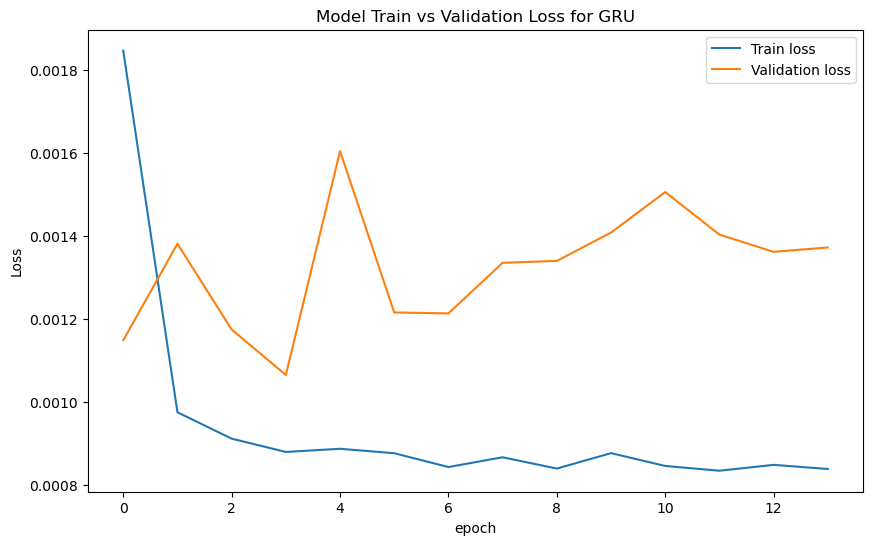

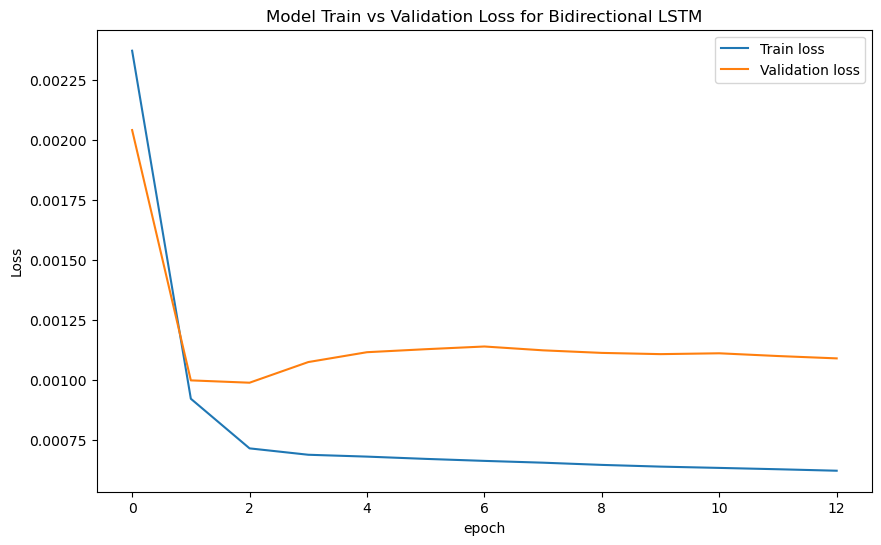

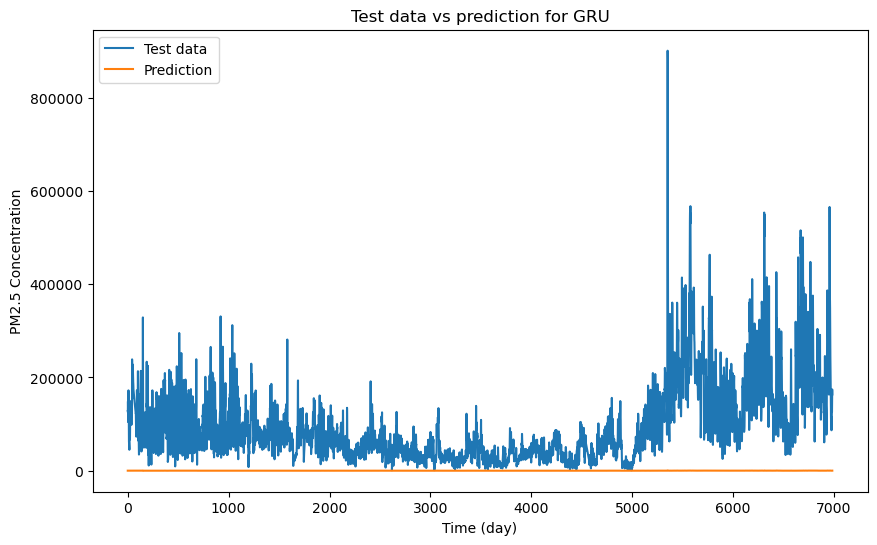

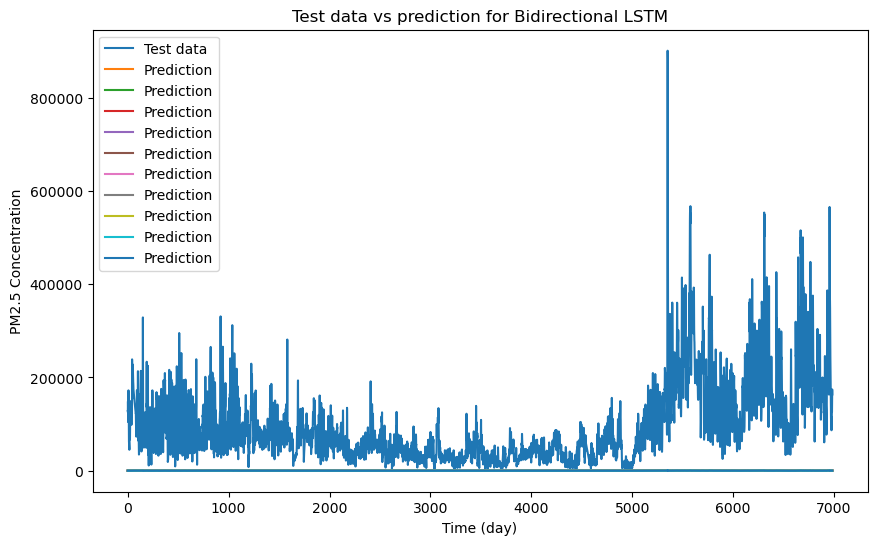

In [18]:
# Plot train loss and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.savefig(r"C:\Users\SURUJ_KALITA\Desktop\blstm'+model_name+.jpg", format='jpg', dpi=1000)

plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

# Transform data back to original data space
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('PM2.5 Concentration')
       
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

In [19]:
# Select 60 days of data from test data
new_data = test_data.iloc[100:160]
# Scale the input
scaled_data = scaler.transform(new_data)
# Reshape the input 
def create_dataset (X, look_back = 1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        
    return np.array(Xs)

X_30= create_dataset(scaled_data,30)
print('X_30.shape: ', X_30.shape) 

X_30.shape:  (30, 30, 1)


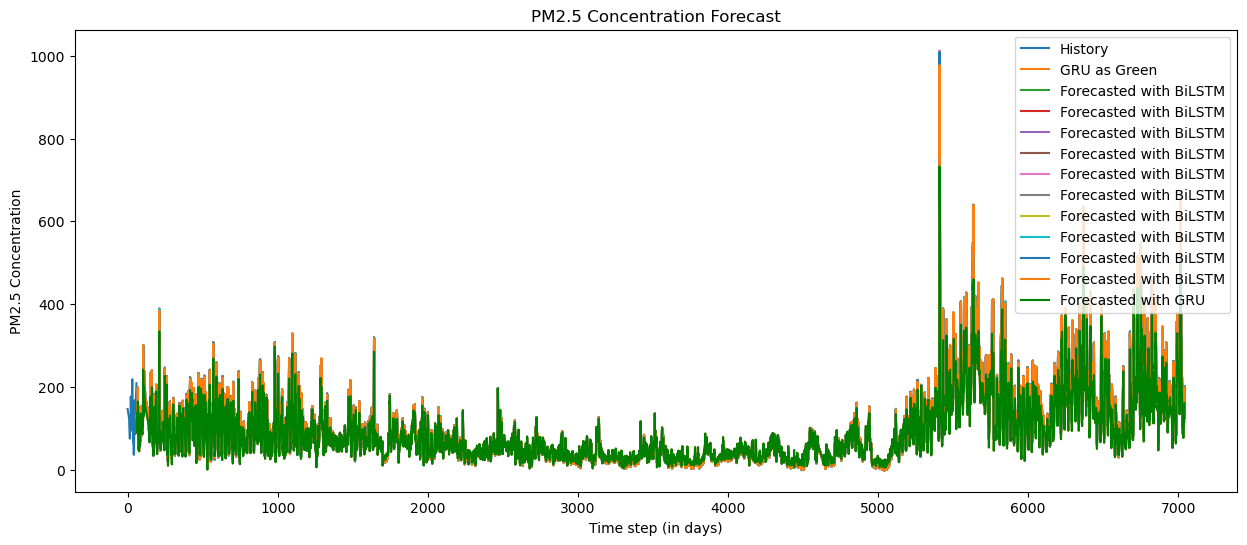

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_step(history, prediction1, prediction2):
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future_gru = np.arange(range_history, range_history + len(prediction1))
    range_future_bilstm = np.arange(range_history, range_history + len(prediction2))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future_gru, np.array(prediction1), label='GRU as Green')
    plt.plot(range_future_bilstm, np.array(prediction2), label='Forecasted with BiLSTM')
    
    #     # Plot GRU predictions with label only once and change color to green
    if 'gru' not in plt.gca().get_legend_handles_labels()[1]:
        plt.plot(range_future_gru, np.array(prediction1), label='Forecasted with GRU', color='GREEN')

    
    plt.legend(loc='upper right')
    plt.xlabel('Time step (in days)')
    plt.ylabel('PM2.5 Concentration')
    plt.title('PM2.5 Concentration Forecast')
    
    plt.show()

# Assuming new_data is a list or array of historical PM2.5 concentrations
plot_multi_step(new_data, prediction_gru, prediction_bilstm)
